In [ ]:
#cargar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Visualizacion de datos**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ryanjt/us-domestic-flights-from-1990-to-2009")

print("Path to dataset files:", path)

100%|██████████| 34.4M/34.4M [00:00<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ryanjt/us-domestic-flights-from-1990-to-2009/versions/1


In [ ]:
import os

# Directorio del dataset
dataset_path = "/root/.cache/kagglehub/datasets/ryanjt/us-domestic-flights-from-1990-to-2009/versions/1"

# Listar archivos y carpetas
files = os.listdir(dataset_path)

print("Archivos y carpetas en el directorio:")
for f in files:
    print(f)


Archivos y carpetas en el directorio:
flights.csv


In [ ]:
import os

In [ ]:
# Asumiendo que el archivo CSV se llama 'flights.csv' dentro del path descargado
csv_file = os.path.join(path, "flights.csv")

# Crear DataFrame
df = pd.read_csv(csv_file)

# Imprimir las primeras filas (header)
print(df.head())


  Origin Destination Origin City Origin State Destination City  \
0    EUG         RDM      Eugene           OR             Bend   
1    EUG         RDM      Eugene           OR             Bend   
2    EUG         RDM      Eugene           OR             Bend   
3    MFR         RDM     Medford           OR             Bend   
4    MFR         RDM     Medford           OR             Bend   

  Destination State  Passengers  Seats  Flights  Distance  Fly Date  \
0                OR          41    396       22     103.0    199011   
1                OR          88    342       19     103.0    199012   
2                OR          11     72        4     103.0    199010   
3                OR           0     18        1     156.0    199002   
4                OR          11     18        1     156.0    199003   

   Origin Population  Destination Population  
0             284093                   76034  
1             284093                   76034  
2             284093               

In [ ]:
# 3. Información general del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606802 entries, 0 to 3606801
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin                  object 
 1   Destination             object 
 2   Origin City             object 
 3   Origin State            object 
 4   Destination City        object 
 5   Destination State       object 
 6   Passengers              int64  
 7   Seats                   int64  
 8   Flights                 int64  
 9   Distance                float64
 10  Fly Date                int64  
 11  Origin Population       int64  
 12  Destination Population  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 357.7+ MB


In [ ]:
# 4. Estadísticas descriptivas de las columnas numéricas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Passengers,3606802.0,2.688911e+03,4.347617e+03,0.0,109.0,1118.0,3503.0,89597.0
Seats,3606802.0,4.048298e+03,6.200872e+03,0.0,156.0,1998.0,5370.0,147062.0
Flights,3606802.0,3.722891e+01,4.961970e+01,0.0,2.0,25.0,55.0,1128.0
Distance,3606802.0,6.973192e+02,6.044165e+02,0.0,273.0,519.0,927.0,5095.0
Fly Date,3606802.0,2.000634e+05,5.746699e+02,199001.0,199603.0,200111.0,200601.0,200912.0
Origin Population,3606802.0,5.871504e+06,7.858062e+06,13005.0,1030597.0,2400193.0,8613622.0,38139592.0
Destination Population,3606802.0,5.897984e+06,7.906128e+06,12887.0,1025470.0,2400193.0,8635706.0,38139592.0


In [ ]:
# 5. Valores faltantes por columna
df.isnull().sum()


,0
Origin,0
Destination,0
Origin City,0
Origin State,0
Destination City,0
Destination State,0
Passengers,0
Seats,0
Flights,0
Distance,0


In [ ]:
# Columnas no numéricas a analizar
categorical_columns = [
    "Origin", "Destination",
    "Origin City", "Origin State",
    "Destination City", "Destination State"
]

# Imprimir número de categorías únicas por columna
for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} categorías únicas")


Origin: 683 categorías únicas
Destination: 707 categorías únicas
Origin City: 487 categorías únicas
Origin State: 51 categorías únicas
Destination City: 496 categorías únicas
Destination State: 51 categorías únicas


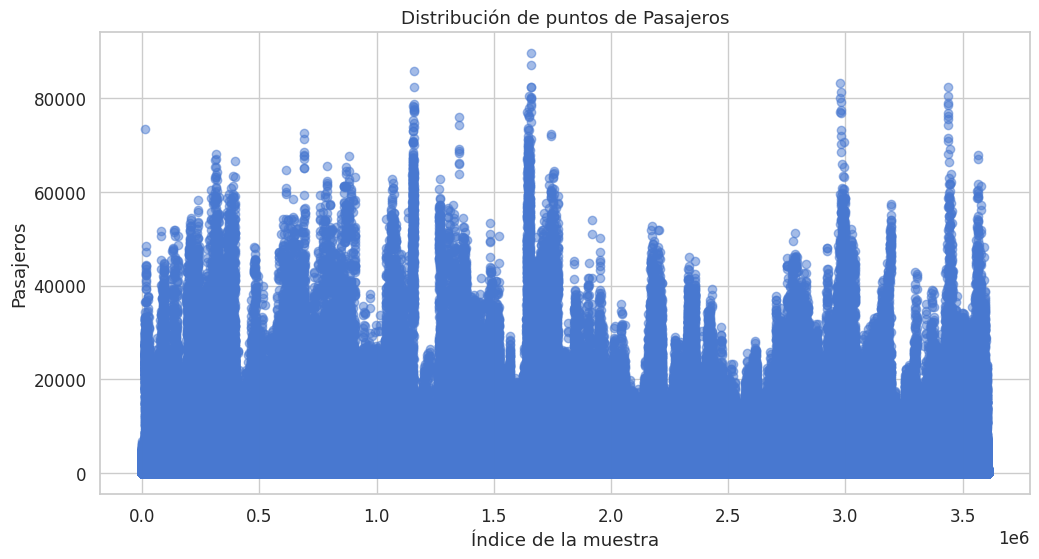

In [ ]:
# Gráfico simple de dispersión de EnergyConsumption
plt.figure(figsize=(12,6))
plt.scatter(range(len(df)), df["Passengers"], alpha=0.5)
plt.title("Distribución de puntos de Pasajeros")
plt.xlabel("Índice de la muestra")
plt.ylabel("Pasajeros")
plt.show()


# **Preprocesamiento de los datos**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copia del dataset
df_encoded = df.copy()

# 1. Label encoding para columnas categóricas
le = LabelEncoder()
categorical_columns = [
    "Origin", "Destination",
    "Origin City", "Origin State",
    "Destination City", "Destination State"
]

for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


# Verificamos las primeras filas
print(df_encoded.head())

   Origin  Destination  Origin City  Origin State  Destination City  \
0     198          546          131            37                39   
1     198          546          131            37                39   
2     198          546          131            37                39   
3     398          546          271            37                39   
4     398          546          271            37                39   

   Destination State  Passengers  Seats  Flights  Distance  Fly Date  \
0                 37          41    396       22     103.0    199011   
1                 37          88    342       19     103.0    199012   
2                 37          11     72        4     103.0    199010   
3                 37           0     18        1     156.0    199002   
4                 37          11     18        1     156.0    199003   

   Origin Population  Destination Population  
0             284093                   76034  
1             284093                   76034  

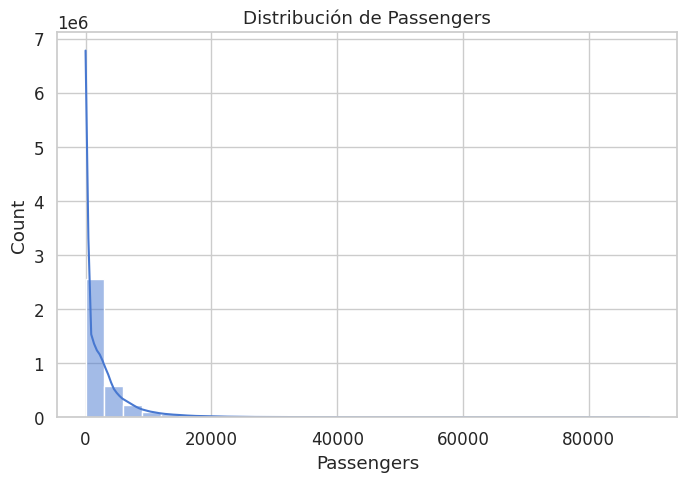

In [ ]:
# 6. Distribución de la variable objetivo (EnergyConsumption)
plt.figure(figsize=(8,5))
sns.histplot(df["Passengers"], kde=True, bins=30)
plt.title("Distribución de Passengers")
plt.show()


In [ ]:
# Número de filas antes de limpiar
before = df_encoded.shape[0]

# Eliminar filas con NaN
df_clean = df_encoded.dropna()

# Número de filas después de limpiar
after = df_clean.shape[0]

# Calcular cuántos ejemplos se borraron
removed = before - after

print(f"Filas antes: {before}")
print(f"Filas después: {after}")
print(f"Filas eliminadas: {removed}")


Filas antes: 3606802
Filas después: 3606802
Filas eliminadas: 0


In [ ]:
df_clean = df_clean.sample(n=80000, random_state=42)  # random_state para reproducibilidad
print(df_clean.shape)


(80000, 13)


# **Entrenamiento regresion polinomica**

In [ ]:
# Define features and target
X = df_clean.drop(["Passengers"], axis=1).values  # Exclude CompanyID and target
y = df_clean["Passengers"].values

In [ ]:
# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
m_train = y_train.size  # Number of training examples
m_test = y_test.size   # Number of test examples

print("Training set dimensions:", X_train.shape)
print("Test set dimensions:", X_test.shape)
print("Target train shape:", y_train.shape)
print("Target test shape:", y_test.shape)

Training set dimensions: (64000, 12)
Test set dimensions: (16000, 12)
Target train shape: (64000,)
Target test shape: (16000,)


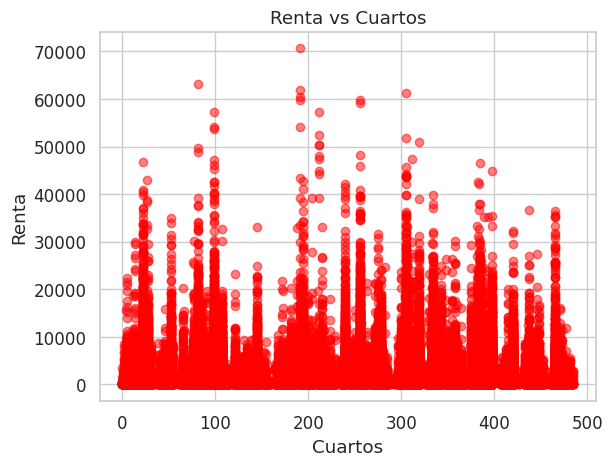

In [ ]:
# Plotting function
def plotData(x, y, xlabel="Feature", ylabel="Passengers"):
    fig = plt.figure()
    plt.scatter(x, y, color='red', marker='o', alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs {xlabel}")
    plt.show()

# Example: Plot EnergyConsumption vs Revenue for training data
plotData(X_train[:, 2], y_train, xlabel="Cuartos", ylabel="Renta")


In [ ]:
# Add polynomial features (degree 2)
def add_polynomial_features(X, degree=2):
    X_poly = X.copy()
    for i in range(X.shape[1]):
        X_poly = np.concatenate([X_poly, X[:, i:i+1] ** 2], axis=1)
    return X_poly

# Apply polynomial features to both train and test sets
X_train_poly = add_polynomial_features(X_train)
X_test_poly = add_polynomial_features(X_test)
print("Training shape with polynomial features:", X_train_poly.shape)
print("Test shape with polynomial features:", X_test_poly.shape)

Training shape with polynomial features: (64000, 24)
Test shape with polynomial features: (16000, 24)


In [ ]:
# Feature normalization
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    # Avoid division by zero
    sigma[sigma == 0] = 1
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalize features (use training set statistics for both train and test)
X_train_norm, mu, sigma = featureNormalize(X_train_poly)
X_test_norm = (X_test_poly - mu) / sigma  # Normalize test set with train statistics
print("Normalized training features sample:\n", X_train_norm[:5])

Normalized training features sample:
 [[-0.22222647 -1.00919322 -0.24909848 -1.64693071 -1.07673362  0.72551757
  -0.48655333 -0.32819347 -0.6148991   1.29217808 -0.69848508 -0.47480459
  -0.48264309 -0.97818415 -0.51238312 -1.13973864 -0.99641748  0.58378629
  -0.21094401 -0.21667777 -0.4561297   1.29364788 -0.39735194 -0.37910296]
 [-0.68743673 -1.31515019  0.56223678  0.44754744 -1.31438028 -0.39391768
   5.96426323  5.10442369 -0.81998886 -0.977817    1.42906325  0.30853149
  -0.82340155 -1.07983691  0.35125775  0.21305346 -1.0622229  -0.63436214
   6.38180749  5.11987076 -0.49574859 -0.97826335  0.81154695 -0.11325948]
 [-0.83890053  1.06920414 -0.90554247 -0.18079601  0.82443972 -0.25398827
  -0.33342252 -0.16782101 -0.05213282  0.59518878  0.39487051 -0.68320188
  -0.90842878  1.08131436 -0.93414703 -0.45911511  0.70561752 -0.52157062
  -0.19961908 -0.1915122  -0.25050449  0.59449318 -0.06439719 -0.3970474 ]
 [-0.83890053  0.30958683 -0.90554247 -0.18079601  0.6588072  -1.093564

In [ ]:
# Add intercept term
X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print("Training shape with intercept term:", X_train_norm.shape)
print("Test shape with intercept term:", X_test_norm.shape)

Training shape with intercept term: (64000, 25)
Test shape with intercept term: (16000, 25)


In [ ]:
# Cost function for multiple features
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    return J

In [ ]:
# Gradient descent for multiple features
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = np.dot(X, theta)
        theta = theta - (alpha / m) * np.dot((h - y), X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [ ]:
# Train the model
alpha = 0.001  # Learning rate
num_iters = 100000  # Number of iterations
thetaPol = np.zeros(X_train_norm.shape[1])  # Initialize theta
thetaPol, J_history = gradientDescentMulti(X_train_norm, y_train, thetaPol, alpha, num_iters)

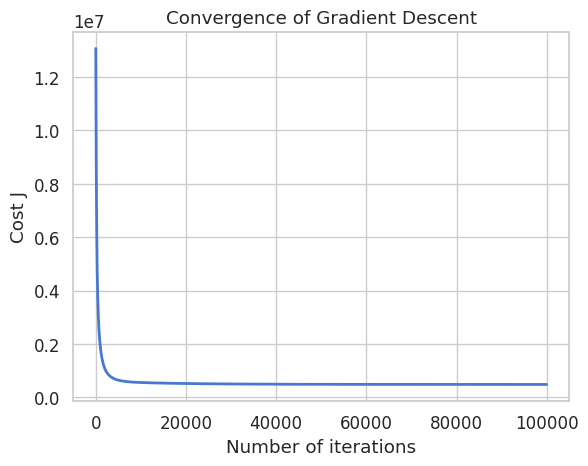

In [ ]:
# Plot convergence of cost function
plt.figure()
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()


In [ ]:
# Display results
print('Theta calculated by gradient descent:', thetaPol)

Theta calculated by gradient descent: [2709.9333125    45.94044135   42.19027874   20.08758732   26.13505183
   34.37933893   45.16884546 4571.07845627 -137.275105    380.69726638
  136.06575643  -54.63567087  -40.69238265  -28.05327458  -27.04599935
  -42.53495908  -46.26276578  -54.78773235  -67.72036305 -302.70002167
   24.1815583  -205.10169781  133.63345097   17.43996419   15.57429339]


In [ ]:
# Evaluate on training set
y_train_pred = np.dot(X_train_norm, thetaPol)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("\nTraining set metrics:")
print(f'R² score on training set: {r2_train:.4f}')
print(f'Mean Squared Error (MSE) on training set: {mse_train:.4f}')
print(f'Mean Absolute Error (MAE) on training set: {mae_train:.4f}')
print(f'Root Mean Squared Error (RMSE) on training set: {rmse_train:.4f}')


Training set metrics:
R² score on training set: 0.9488
Mean Squared Error (MSE) on training set: 969256.7163
Mean Absolute Error (MAE) on training set: 562.5297
Root Mean Squared Error (RMSE) on training set: 984.5084


In [ ]:
# Evaluate on test set
y_pred = np.dot(X_test_norm, thetaPol)

# Calculate accuracy metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R² score on test set: {r2:.4f}')
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')
print(f'Mean Absolute Error (MAE) on test set: {mae:.4f}')
print(f'Root Mean Squared Error (RMSE) on test set: {rmse:.4f}')

R² score on test set: 0.9477
Mean Squared Error (MSE) on test set: 979319.5985
Mean Absolute Error (MAE) on test set: 561.9100
Root Mean Squared Error (RMSE) on test set: 989.6058


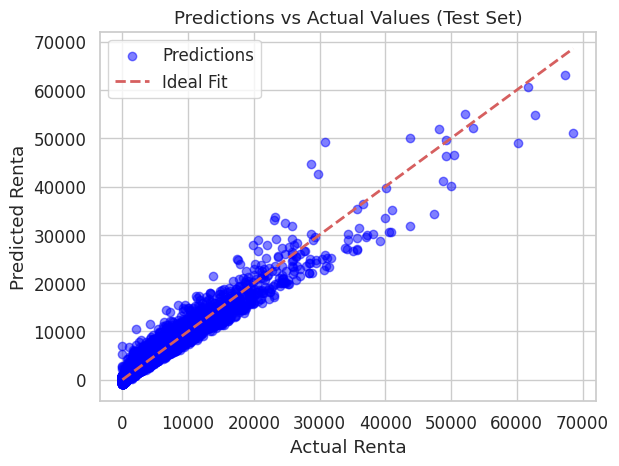

In [ ]:
# Plot predictions vs actual values for test set
plt.figure()
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Renta')
plt.ylabel('Predicted Renta')
plt.title('Predictions vs Actual Values (Test Set)')
plt.legend()
plt.show()

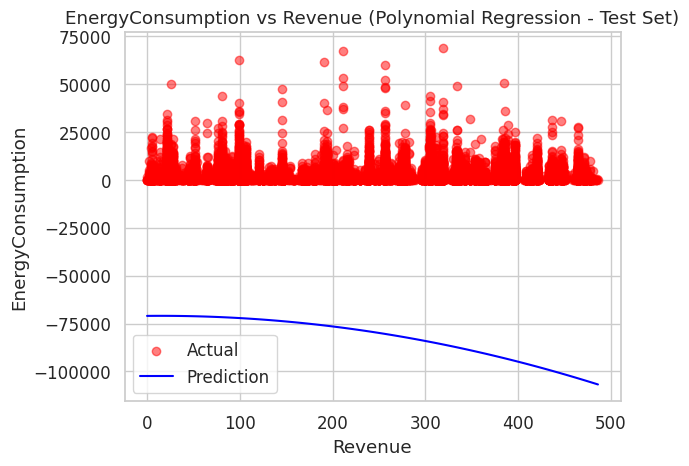

In [ ]:
# Plot predicted vs actual for a selected feature (e.g., Revenue) on test set
feature_idx = 2  # Revenue column
plt.figure()
plt.scatter(X_test[:, feature_idx], y_test, color='red', marker='o', alpha=0.5, label='Actual')
# Generate predictions for plotting
X_range = np.linspace(X_test[:, feature_idx].min(), X_test[:, feature_idx].max(), 100)
X_range_poly = add_polynomial_features(np.repeat(X_range[:, np.newaxis], X.shape[1], axis=1))
X_range_norm = (X_range_poly - mu) / sigma
X_range_norm = np.concatenate([np.ones((X_range_norm.shape[0], 1)), X_range_norm], axis=1)
y_pred_range = np.dot(X_range_norm, thetaPol)
plt.plot(X_range, y_pred_range, '-', color='blue', label='Prediction')
plt.xlabel('Revenue')
plt.ylabel('EnergyConsumption')
plt.title('EnergyConsumption vs Revenue (Polynomial Regression - Test Set)')
plt.legend()
plt.show()

# **Modelo de regresion multivariable**

In [ ]:
# Define features and target
X = df_clean.drop(["Passengers"], axis=1).values  # Exclude CompanyID and target
y = df_clean["Passengers"].values

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
m_train = y_train.size  # Number of training examples
m_test = y_test.size   # Number of test examples

print("Training set dimensions:", X_train.shape)
print("Test set dimensions:", X_test.shape)
print("Target train shape:", y_train.shape)
print("Target test shape:", y_test.shape)


Training set dimensions: (64000, 12)
Test set dimensions: (16000, 12)
Target train shape: (64000,)
Target test shape: (16000,)


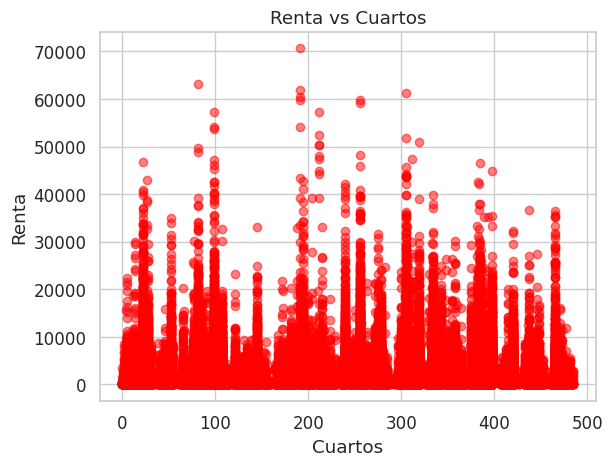

In [ ]:
# Plotting function
def plotData(x, y, xlabel="Feature", ylabel="Passengers"):
    fig = plt.figure()
    plt.scatter(x, y, color='red', marker='o', alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs {xlabel}")
    plt.show()

# Example: Plot EnergyConsumption vs Revenue for training data
plotData(X_train[:, 2], y_train, xlabel="Cuartos", ylabel="Renta")


In [ ]:
# Feature normalization
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    # Avoid division by zero
    sigma[sigma == 0] = 1
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalize features (use training set statistics for both train and test)
X_train_norm, mu, sigma = featureNormalize(X_train)
X_test_norm = (X_test - mu) / sigma  # Normalize test set with train statistics
print("Normalized training features sample:\n", X_train_norm[:5])

Normalized training features sample:
 [[-0.22222647 -1.00919322 -0.24909848 -1.64693071 -1.07673362  0.72551757
  -0.48655333 -0.32819347 -0.6148991   1.29217808 -0.69848508 -0.47480459]
 [-0.68743673 -1.31515019  0.56223678  0.44754744 -1.31438028 -0.39391768
   5.96426323  5.10442369 -0.81998886 -0.977817    1.42906325  0.30853149]
 [-0.83890053  1.06920414 -0.90554247 -0.18079601  0.82443972 -0.25398827
  -0.33342252 -0.16782101 -0.05213282  0.59518878  0.39487051 -0.68320188]
 [-0.83890053  0.30958683 -0.90554247 -0.18079601  0.6588072  -1.09356471
  -0.41795846 -0.56875217  0.4220347  -0.27213706  0.39051864 -0.55361333]
 [ 0.94620858 -0.19682471  0.76875849 -1.50729884  1.73181791 -1.23349411
  -0.62277696 -0.72912463  2.06111201 -1.48708848 -0.4480454   0.32328484]]


In [ ]:
# Add intercept term
X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print("Training shape with intercept term:", X_train_norm.shape)
print("Test shape with intercept term:", X_test_norm.shape)

Training shape with intercept term: (64000, 13)
Test shape with intercept term: (16000, 13)


In [ ]:
# Cost function for multiple features
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

# Gradient descent for multiple features
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = np.dot(X, theta)
        theta = theta - (alpha / m) * np.dot((h - y), X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [ ]:
# Train the model
alpha = 0.001  # Learning rate
num_iters = 10000  # Number of iterations
thetaMul = np.zeros(X_train_norm.shape[1])  # Initialize theta
thetaMul, J_history = gradientDescentMulti(X_train_norm, y_train, thetaMul, alpha, num_iters)

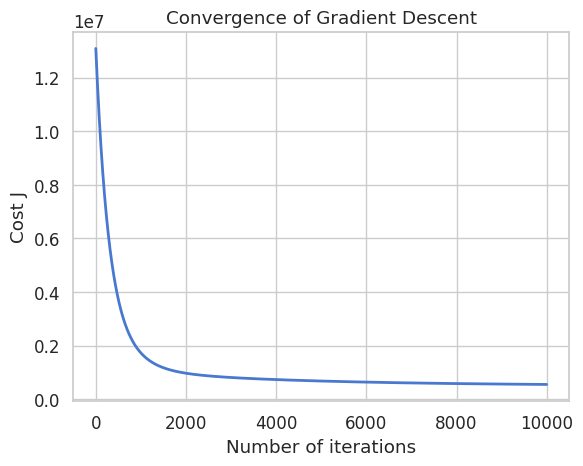

Theta calculated by gradient descent: [2709.81089574   35.1660542    31.92207704  -34.5707818   -24.50047585
  -32.81464965  -27.17375855 3743.84874698  459.04499425  296.50865837
  200.47725911  -25.82636307   -9.2219771 ]


In [ ]:
# Plot convergence of cost function
plt.figure()
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

# Display results
print('Theta calculated by gradient descent:', thetaMul)

In [ ]:
# Evaluate on training set
y_train_pred = np.dot(X_train_norm, thetaMul)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("\nTraining set metrics:")
print(f'R² score on training set: {r2_train:.4f}')
print(f'Mean Squared Error (MSE) on training set: {mse_train:.4f}')
print(f'Mean Absolute Error (MAE) on training set: {mae_train:.4f}')
print(f'Root Mean Squared Error (RMSE) on training set: {rmse_train:.4f}')


Training set metrics:
R² score on training set: 0.9418
Mean Squared Error (MSE) on training set: 1100534.7988
Mean Absolute Error (MAE) on training set: 600.3900
Root Mean Squared Error (RMSE) on training set: 1049.0638


In [ ]:
# Evaluate on test set
y_test_pred = np.dot(X_test_norm, thetaMul)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("\nTest set metrics:")
print(f'R² score on test set: {r2_test:.4f}')
print(f'Mean Squared Error (MSE) on test set: {mse_test:.4f}')
print(f'Mean Absolute Error (MAE) on test set: {mae_test:.4f}')
print(f'Root Mean Squared Error (RMSE) on test set: {rmse_test:.4f}')


Test set metrics:
R² score on test set: 0.9420
Mean Squared Error (MSE) on test set: 1085652.5632
Mean Absolute Error (MAE) on test set: 597.5180
Root Mean Squared Error (RMSE) on test set: 1041.9465


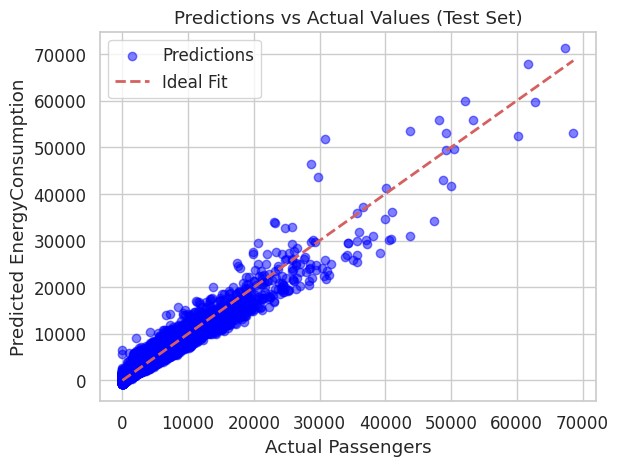

In [ ]:
# Plot predictions vs actual values for test set
plt.figure()
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Passengers')
plt.ylabel('Predicted EnergyConsumption')
plt.title('Predictions vs Actual Values (Test Set)')
plt.legend()
plt.show()

# **Ecuacion de la normal**

In [ ]:
# Define features and target
X = df_clean.drop(["Passengers"], axis=1).values  # Exclude CompanyID and target
y = df_clean["Passengers"].values

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
m_train = y_train.size  # Number of training examples
m_test = y_test.size    # Number of test examples

print("Training set dimensions:", X_train.shape)
print("Test set dimensions:", X_test.shape)
print("Target train shape:", y_train.shape)
print("Target test shape:", y_test.shape)

Training set dimensions: (64000, 12)
Test set dimensions: (16000, 12)
Target train shape: (64000,)
Target test shape: (16000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Normal Equation function
def normalEqn(X, y):
    """
    Compute the optimal theta using the Normal Equation.

    Parameters:
    X : array-like, shape (m, n), feature matrix
    y : array-like, shape (m,), target vector

    Returns:
    theta : array-like, shape (n,), optimal parameters
    """
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

# Add intercept term to training and test sets
X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train], axis=1)
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test], axis=1)

print("Training shape with intercept term:", X_train_norm.shape)
print("Test shape with intercept term:", X_test_norm.shape)

Training shape with intercept term: (64000, 13)
Test shape with intercept term: (16000, 13)


In [ ]:
# Train the model using the Normal Equation
thetaNor = normalEqn(X_train_norm, y_train)
print('Theta calculated by the Normal Equation:', thetaNor)

# Evaluate on training set
y_train_pred = np.dot(X_train_norm, thetaNor)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("\nTraining set metrics (Linear Regression - Normal Equation):")
print(f'R² score on training set: {r2_train:.4f}')
print(f'Mean Squared Error (MSE) on training set: {mse_train:.4f}')
print(f'Mean Absolute Error (MAE) on training set: {mae_train:.4f}')
print(f'Root Mean Squared Error (RMSE) on training set: {rmse_train:.4f}')

# Evaluate on test set
y_test_pred = np.dot(X_test_norm, thetaNor)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("\nTest set metrics (Linear Regression - Normal Equation):")
print(f'R² score on test set: {r2_test:.4f}')
print(f'Mean Squared Error (MSE) on test set: {mse_test:.4f}')
print(f'Mean Absolute Error (MAE) on test set: {mae_test:.4f}')
print(f'Root Mean Squared Error (RMSE) on test set: {rmse_test:.4f}')

Theta calculated by the Normal Equation: [-8.95050007e+04  1.72968017e-01  1.58681402e-01 -2.17366154e-01
 -9.45897296e-01 -1.99106468e-01 -1.00755387e+00  6.98315805e-01
 -2.54238436e+00  3.25920497e-01  4.46415444e-01 -4.02414503e-06
 -2.48208738e-06]

Training set metrics (Linear Regression - Normal Equation):
R² score on training set: 0.9467
Mean Squared Error (MSE) on training set: 1007358.6372
Mean Absolute Error (MAE) on training set: 558.1468
Root Mean Squared Error (RMSE) on training set: 1003.6726

Test set metrics (Linear Regression - Normal Equation):
R² score on test set: 0.9472
Mean Squared Error (MSE) on test set: 989650.6087
Mean Absolute Error (MAE) on test set: 556.2005
Root Mean Squared Error (RMSE) on test set: 994.8118


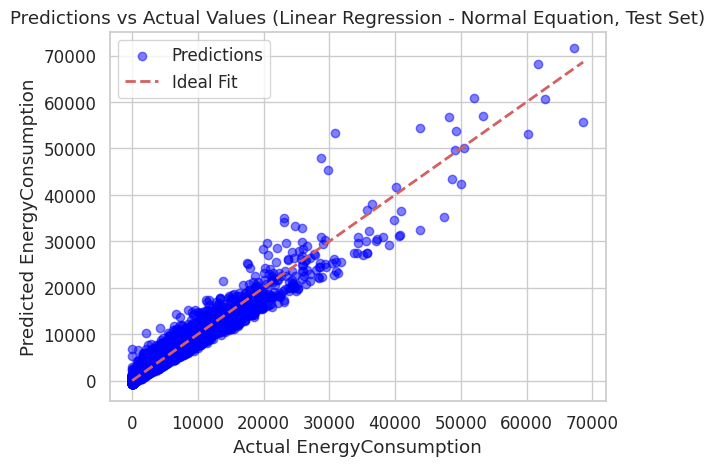

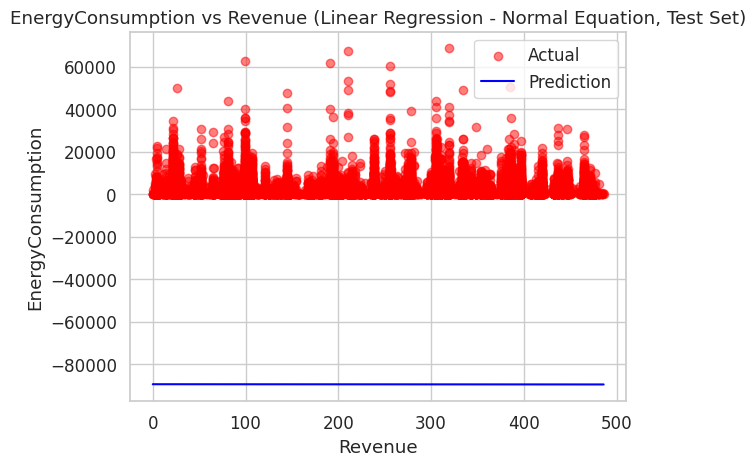

In [ ]:
# Plot predictions vs actual values for test set
plt.figure()
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual EnergyConsumption')
plt.ylabel('Predicted EnergyConsumption')
plt.title('Predictions vs Actual Values (Linear Regression - Normal Equation, Test Set)')
plt.legend()
plt.show()

# Plot predicted vs actual for Revenue on test set
feature_idx = 2  # Revenue column
plt.figure()
plt.scatter(X_test[:, feature_idx], y_test, color='red', marker='o', alpha=0.5, label='Actual')
# Generate predictions for plotting
X_range = np.linspace(X_test[:, feature_idx].min(), X_test[:, feature_idx].max(), 100)
X_range_full = np.zeros((100, X_train.shape[1]))
X_range_full[:, feature_idx] = X_range
X_range_norm = np.concatenate([np.ones((100, 1)), X_range_full], axis=1)
y_pred_range = np.dot(X_range_norm, thetaNor)
plt.plot(X_range, y_pred_range, '-', color='blue', label='Prediction')
plt.xlabel('Revenue')
plt.ylabel('EnergyConsumption')
plt.title('EnergyConsumption vs Revenue (Linear Regression - Normal Equation, Test Set)')
plt.legend()
plt.show()

# **Probando los tres modelos**

In [ ]:
def predict_energy_consumption(example, y_actual=None, mu_linear=None, sigma_linear=None, mu_poly=None, sigma_poly=None, theta_linear=None, theta_poly=None, theta_normal=None):
    """
    Predict EnergyConsumption for a single example using three models:
    Multivariable Linear Regression (Gradient Descent), Polynomial Regression (Gradient Descent),
    and Linear Regression (Normal Equation).

    Parameters:
    - example: array-like, a single example (row) of features (excluding CompanyID and EnergyConsumption)
    - y_actual: float, the actual EnergyConsumption value (optional, for comparison)
    - mu_linear: array-like, mean of training features for linear model (for normalization)
    - sigma_linear: array-like, standard deviation of training features for linear model (for normalization)
    - mu_poly: array-like, mean of polynomial training features (for normalization)
    - sigma_poly: array-like, standard deviation of polynomial training features (for normalization)
    - theta_linear: array-like, parameters for multivariable linear regression (gradient descent)
    - theta_poly: array-like, parameters for polynomial regression (gradient descent)
    - theta_normal: array-like, parameters for linear regression (Normal Equation)

    Returns:
    - None (prints predictions and actual value if provided)
    """
    # Ensure example is a numpy array
    example = np.array(example)

    # Check if input is valid
    if mu_linear is None or sigma_linear is None or mu_poly is None or sigma_poly is None:
        raise ValueError("mu_linear, sigma_linear, mu_poly, and sigma_poly must be provided for normalization.")
    if theta_linear is None or theta_poly is None or theta_normal is None:
        raise ValueError("All theta parameters must be provided.")

    # Add polynomial features for polynomial model
    def add_polynomial_features(X, degree=2):
        X_poly = X.copy()
        for i in range(X.shape[1]):
            X_poly = np.concatenate([X_poly, X[:, i:i+1] ** 2], axis=1)
        return X_poly

    # 1. Multivariable Linear Regression (Gradient Descent)
    # Normalize the example using training set statistics
    example_norm_linear = (example - mu_linear) / sigma_linear
    example_norm_linear = np.concatenate([[1], example_norm_linear])  # Add intercept term
    pred_linear = np.dot(example_norm_linear, theta_linear)

    # 2. Polynomial Regression (Gradient Descent)
    # Add polynomial features and normalize
    example_poly = add_polynomial_features(example.reshape(1, -1))
    example_poly_norm = (example_poly - mu_poly) / sigma_poly
    example_poly_norm = np.concatenate([[1], example_poly_norm[0]])  # Add intercept term
    pred_poly = np.dot(example_poly_norm, theta_poly)

    # 3. Linear Regression (Normal Equation)
    # No normalization needed
    example_normal = np.concatenate([[1], example])  # Add intercept term
    pred_normal = np.dot(example_normal, theta_normal)

    # Print predictions
    print("\nPredictions for the example:")
    print(f"Multivariable Linear Regression (Gradient Descent): {pred_linear:.4f}")
    print(f"Polynomial Regression (Gradient Descent): {pred_poly:.4f}")
    print(f"Linear Regression (Normal Equation): {pred_normal:.4f}")

    # Print actual value if provided
    if y_actual is not None:
        print(f"Numero de pasajeros: {y_actual:.4f}")

In [ ]:
# Example usage:
# Assuming the models have been trained and theta, mu, sigma are available
# Select a random example from the dataset
np.random.seed(42)  # For reproducibility
i = np.random.randint(0, X.shape[0])
example = X[i]
y_actual = y[i]

# Need to recalculate mu and sigma for polynomial features
X_train_poly_temp = add_polynomial_features(X_train)
_, mu_poly_calc, sigma_poly_calc = featureNormalize(X_train_poly_temp)

# Need to recalculate mu and sigma for linear features
_, mu_linear_calc, sigma_linear_calc = featureNormalize(X_train)


# Call the function for random example
predict_energy_consumption(
    example=example,
    y_actual=y_actual,
    mu_linear=mu_linear_calc,
    sigma_linear=sigma_linear_calc,
    mu_poly=mu_poly_calc,
    sigma_poly=sigma_poly_calc,
    theta_linear=thetaMul,  # From multivariable linear regression (gradient descent)
    theta_poly=thetaPol,  # From polynomial regression (gradient descent)
    theta_normal=thetaNor  # From linear regression (Normal Equation)
)


Predictions for the example:
Multivariable Linear Regression (Gradient Descent): 25.2455
Polynomial Regression (Gradient Descent): 58.1390
Linear Regression (Normal Equation): 86.7857
Numero de pasajeros: 60.0000
